<a href="https://colab.research.google.com/github/mminerva/GAN-SOM/blob/master/cGAN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [0]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2234 (delta 3), reused 8 (delta 3), pack-reused 2226
Receiving objects: 100% (2234/2234), 8.05 MiB | 10.11 MiB/s, done.
Resolving deltas: 100% (1443/1443), done.


In [0]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [0]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 16.2MB/s 
     |████████████████████████████████| 204kB 42.2MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=ecbb11618c99b415c5a8fe615ef0b9bd7c5c467662db6a5ec9e0c3f84aa9b206
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=0474f8d6ed2ccf7e1adb504f171d3a71c204bd17f494aa00c74e2ca2d2662a3e
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [0]:
!bash ./datasets/download_pix2pix_dataset.sh edges2shoes

Streaming output truncated to the last 5000 lines.
edges2shoes/train/46383_AB.jpg
edges2shoes/train/46384_AB.jpg
edges2shoes/train/46385_AB.jpg
edges2shoes/train/46386_AB.jpg
edges2shoes/train/46387_AB.jpg
edges2shoes/train/46388_AB.jpg
edges2shoes/train/46389_AB.jpg
edges2shoes/train/4638_AB.jpg
edges2shoes/train/46390_AB.jpg
edges2shoes/train/46391_AB.jpg
edges2shoes/train/46392_AB.jpg
edges2shoes/train/449_AB.jpg
edges2shoes/train/44_AB.jpg
edges2shoes/train/45000_AB.jpg
edges2shoes/train/45001_AB.jpg
edges2shoes/train/45002_AB.jpg
edges2shoes/train/45003_AB.jpg
edges2shoes/train/45004_AB.jpg
edges2shoes/train/45005_AB.jpg
edges2shoes/train/45006_AB.jpg
edges2shoes/train/45007_AB.jpg
edges2shoes/train/45008_AB.jpg
edges2shoes/train/45009_AB.jpg
edges2shoes/train/4500_AB.jpg
edges2shoes/train/45010_AB.jpg
edges2shoes/train/45011_AB.jpg
edges2shoes/train/45012_AB.jpg
edges2shoes/train/45013_AB.jpg
edges2shoes/train/45687_AB.jpg
edges2shoes/train/45688_AB.jpg
edges2shoes/train/45689_AB

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [0]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2020-04-13 08:48:52--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  17.1MB/s    in 20s     

2020-04-13 08:49:13 (10.2 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [0]:
!python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [0]:
!ls checkpoints/

edges2shoes_pretrained	facades_label2photo_pretrained	facades_pix2pix


In [0]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/edges2shoes        	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [0]:
os.chdir('./pytorch-CycleGAN-and-pix2pix')

# Visualize

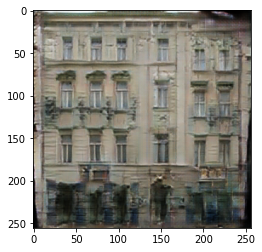

In [0]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_fake_B.png')
plt.imshow(img)

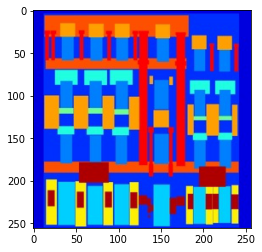

In [0]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_A.png')
plt.imshow(img)

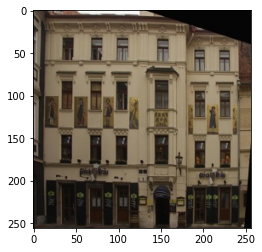

In [0]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_B.png')
plt.imshow(img)

# Utility

##Useful linux commands

In [0]:
!pwd

pytorch-CycleGAN-and-pix2pix  sample_data


In [0]:
!ls ../../

bin					   etc	  opt	 sys
boot					   home   proc	 tensorflow-1.15.2
content					   lib	  root	 tmp
datalab					   lib32  run	 tools
dev					   lib64  sbin	 usr
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media  srv	 var
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt	  swift


In [0]:
!ls -a 

.  ..  .git  pytorch-CycleGAN-and-pix2pix  README.md


In [0]:
os.chdir('../')

/content


In [0]:
!cp -r ./pytorch-CycleGAN-and-pix2pix/results ./GAN-SOM

In [0]:
!mv ./datasets ./pytorch-CycleGAN-and-pix2pix

##GitHub repo

Clone repo here

In [0]:
u = 'usr'
p = 'pwd'
!git clone https://$u:$p@github.com/mminerva/GAN-SOM

Cloning into 'GAN-SOM'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 0), reused 157 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 13.32 MiB | 14.73 MiB/s, done.


After working, to commit work

In [0]:
!rm -r GAN-SOM/results/*
!cp -r ./pytorch-CycleGAN-and-pix2pix/results/* ./GAN-SOM/results/

In [0]:
os.chdir('./GAN-SOM')

In [0]:
!git add -A

In [0]:
!git config user.email “michi.minerva@gmail.com”
!git config user.name “mminerva”
!git commit -m 'test results'

[master f4af264] test results
 654 files changed, 5832 insertions(+)
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1114_fake_B.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1114_real_A.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1114_real_B.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1115_fake_B.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1115_real_A.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1115_real_B.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1117_fake_B.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1117_real_A.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_to_1117_real_B.png
 create mode 100644 results/day2night_pretrained/test_latest/images/14_1137_

In [0]:
!git remote rm origin

In [0]:
u = 'usr'
p = 'pwd'
!git remote add origin https://$u:$p@github.com/mminerva/GAN-SOM

In [0]:
!git config http.postBuffer 524288000

In [0]:
!git push -u origin master

Counting objects: 514, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (509/509), done.
Writing objects: 100% (514/514), 42.91 MiB | 14.47 MiB/s, done.
Total 514 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 1 local object.
To https://github.com/mminerva/GAN-SOM
   ecb062c..f4af264  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


# Tests

Edges2shoes, maps don't have the est folder

## Edges2shoes

In [0]:
!bash ./datasets/download_pix2pix_dataset.sh edges2shoes

Streaming output truncated to the last 5000 lines.
edges2shoes/train/46383_AB.jpg
edges2shoes/train/46384_AB.jpg
edges2shoes/train/46385_AB.jpg
edges2shoes/train/46386_AB.jpg
edges2shoes/train/46387_AB.jpg
edges2shoes/train/46388_AB.jpg
edges2shoes/train/46389_AB.jpg
edges2shoes/train/4638_AB.jpg
edges2shoes/train/46390_AB.jpg
edges2shoes/train/46391_AB.jpg
edges2shoes/train/46392_AB.jpg
edges2shoes/train/449_AB.jpg
edges2shoes/train/44_AB.jpg
edges2shoes/train/45000_AB.jpg
edges2shoes/train/45001_AB.jpg
edges2shoes/train/45002_AB.jpg
edges2shoes/train/45003_AB.jpg
edges2shoes/train/45004_AB.jpg
edges2shoes/train/45005_AB.jpg
edges2shoes/train/45006_AB.jpg
edges2shoes/train/45007_AB.jpg
edges2shoes/train/45008_AB.jpg
edges2shoes/train/45009_AB.jpg
edges2shoes/train/4500_AB.jpg
edges2shoes/train/45010_AB.jpg
edges2shoes/train/45011_AB.jpg
edges2shoes/train/45012_AB.jpg
edges2shoes/train/45013_AB.jpg
edges2shoes/train/45687_AB.jpg
edges2shoes/train/45688_AB.jpg
edges2shoes/train/45689_AB

In [0]:
!mkdir ./datasets/edges2shoes/test
!cp -r ./datasets/edges2shoes/val/* ./datasets/edges2shoes/test

In [0]:
!bash ./scripts/download_pix2pix_model.sh edges2shoes

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [edges2shoes]
for details.

--2020-04-13 16:30:36--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’

./checkpoints/edges 100%[===================>] 207.62M  20.2MB/s    in 12s     

2020-04-13 16:30:48 (17.9 MB/s) - ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’ saved [217704688/217704688]



In [0]:
!python test.py --dataroot ./datasets/edges2shoes --direction BtoA --model pix2pix --name edges2shoes_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/edges2shoes        	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

##Sat2map

In [0]:
!bash ./datasets/download_pix2pix_dataset.sh maps

Specified [maps]
for details.

--2020-04-13 16:09:23--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/maps.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250242400 (239M) [application/x-gzip]
Saving to: ‘./datasets/maps.tar.gz’

./datasets/maps.tar 100%[===================>] 238.65M  1.63MB/s    in 2m 54s  

2020-04-13 16:12:18 (1.37 MB/s) - ‘./datasets/maps.tar.gz’ saved [250242400/250242400]

maps/
maps/train/
maps/train/1.jpg
maps/train/10.jpg
maps/train/100.jpg
maps/train/1000.jpg
maps/train/1001.jpg
maps/train/1002.jpg
maps/train/1003.jpg
maps/train/1004.jpg
maps/train/1005.jpg
maps/train/1006.jpg
maps/train/1007.jpg
maps/train/1008.jpg
maps/train/1009.jpg
maps/train/101.jpg
maps/train/1010.jpg
maps/train/1011.jpg
maps/train/1012.jpg
maps/train/1013.jpg
maps/train/1014.jpg
m

In [0]:
!bash ./scripts/download_pix2pix_model.sh sat2map

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [sat2map]
for details.

--2020-04-13 16:12:25--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/sat2map.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/sat2map_pretrained/latest_net_G.pth’

./checkpoints/sat2m 100%[===================>] 207.62M  20.9MB/s    in 17s     

2020-04-13 16:12:42 (12.6 MB/s) - ‘./checkpoints/sat2map_pretrained/latest_net_G.pth’ saved [217704720/217704720]



In [0]:
!mkdir ./datasets/maps/test
!cp -r ./datasets/maps/val/* ./datasets/maps/test

In [0]:
!python test.py --dataroot ./datasets/maps --direction BtoA --model pix2pix --name sat2map_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/maps               	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

##Map2sat

In [0]:
#!bash ./datasets/download_pix2pix_dataset.sh maps

In [0]:
!bash ./scripts/download_pix2pix_model.sh map2sat

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [map2sat]
for details.

--2020-04-13 16:12:47--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/map2sat.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217713713 (208M)
Saving to: ‘./checkpoints/map2sat_pretrained/latest_net_G.pth’

./checkpoints/map2s 100%[===================>] 207.63M  20.8MB/s    in 12s     

2020-04-13 16:12:59 (17.9 MB/s) - ‘./checkpoints/map2sat_pretrained/latest_net_G.pth’ saved [217713713/217713713]



In [0]:
!python test.py --dataroot ./datasets/maps --direction BtoA --model pix2pix --name map2sat_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/maps               	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

##Facades_label2photo

In [0]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2020-04-13 14:14:00--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M  1.74MB/s    in 31s     

2020-04-13 14:14:31 (942 KB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.j

In [0]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2020-04-13 14:14:33--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  21.4MB/s    in 18s     

2020-04-13 14:14:52 (11.6 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



In [0]:
!python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_label2photo_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

##Day2night

In [0]:
!bash ./datasets/download_pix2pix_dataset.sh night2day

Streaming output truncated to the last 5000 lines.
night2day/train/90_7568_to_7560.jpg
night2day/train/90_7568_to_7561.jpg
night2day/train/90_7568_to_7562.jpg
night2day/train/90_7568_to_7564.jpg
night2day/train/90_7568_to_7566.jpg
night2day/train/90_7618_to_7603.jpg
night2day/train/90_7618_to_7604.jpg
night2day/train/90_7618_to_7605.jpg
night2day/train/90_7618_to_7606.jpg
night2day/train/90_7618_to_7607.jpg
night2day/train/90_7618_to_7609.jpg
night2day/train/90_7618_to_7611.jpg
night2day/train/90_7618_to_7612.jpg
night2day/train/90_7618_to_7613.jpg
night2day/train/90_7618_to_7614.jpg
night2day/train/90_7618_to_7617.jpg
night2day/train/90_7618_to_7619.jpg
night2day/train/90_7618_to_7620.jpg
night2day/train/90_7618_to_7621.jpg
night2day/train/90_7618_to_7622.jpg
night2day/train/90_7618_to_7624.jpg
night2day/train/90_7623_to_7546.jpg
night2day/train/90_7623_to_7547.jpg
night2day/train/90_7623_to_7548.jpg
night2day/train/90_7623_to_7549.jpg
night2day/train/90_7623_to_7550.jpg
night2day/tra

In [0]:
!bash ./scripts/download_pix2pix_model.sh day2night

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [day2night]
for details.

--2020-04-13 16:08:59--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/day2night.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217710797 (208M)
Saving to: ‘./checkpoints/day2night_pretrained/latest_net_G.pth’

./checkpoints/day2n 100%[===================>] 207.62M  21.7MB/s    in 17s     

2020-04-13 16:09:17 (12.1 MB/s) - ‘./checkpoints/day2night_pretrained/latest_net_G.pth’ saved [217710797/217710797]



In [0]:
!python test.py --dataroot ./datasets/night2day --direction BtoA --model pix2pix --name day2night_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/night2day          	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            